$$
\left\{ \begin{align*}
         \frac{dx}{dt} &= (y-x^3 - x)/\epsilon, \\		   
		\frac{dy}{dt} &= a - x \end{align*} \right.
		\qquad
$$

In [9]:
import sympy as sym

#states
i_l = sym.symbols('i_l')

x = [i_l]

#inputs
v = sym.symbols('v')

#params
L,R = sym.symbols('L,R')

#derivatives
di_l = 1/L*(v-R*i_l)

dx = [di_l]

In [13]:
L = 0.01
R = 1.0

pars = {
        'L': 0.01, 
        'R': 0.1, 
        'v': 1.0
      }

varspecs = {}
for x_i,dx_i in zip(x,dx):
    varspecs.update({str(x_i):str(dx_i)})

In [11]:
varspecs

{i_l: (-R*i_l + v)/L}

In [ ]:
import PyDSTool as dst
from PyDSTool import args
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

icdict = {'i_l': 0.0,
         }

DSargs = args(name='sym_ds_1')  # struct-like data
DSargs.pars = pars
DSargs.tdata = [0, 15]

DSargs.algparams = {'max_pts': 1000, 'init_step': 0.02, 'stiff': True}

DSargs.varspecs = varspecs

#DSargs.xdomain = {'x': [-2.2, 2.5], 'y': [-2, 2]}
DSargs.ics = icdict
sys = dst.Vode_ODEsystem(DSargs)

0.2169022560119629


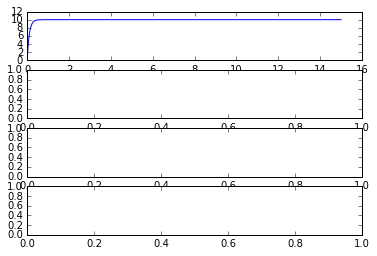

In [24]:
x

Matrix([[i_l]])

In [22]:
f =sym.Matrix(dx)
x =sym.Matrix(x)
sym.diff(f,x)

AttributeError: ImmutableMatrix has no attribute _diff_wrt.

In [49]:
from IPython.display import display, clear_output
import sys as ssys
from pyswarm import pso

def obj(x):
    sys.pars['K_w1'] = x
    pts = sys.compute('test_traj').sample()
    f_min = np.min(pts['Df'])
    #clear_output(wait=True)
    #print(pts['e_nc'][-1]-9)
    #ssys.stdout.flush()    
    return -f_min

def con(x):
    pts = sys.compute('test_traj').sample()
    return pts['e_nc'][-1]-9.5

lb = [10]
ub = [500]

print(obj(11))
xopt, fopt = pso(obj, lb, ub, f_ieqcons=con, args=(), kwargs={},
    swarmsize=10, omega=0.5, phip=0.5, phig=0.5, maxiter=100, minstep=1e-8,
    minfunc=0.1, debug=False)


# Optimum should be around x=[0.5, 0.76] with banana(x)=4.5 and con(x)=0
pts = sys.compute('test_traj').sample()
print(sys.pars['K_w1'])
print(pts['e_nc'][-1])
print(np.min(pts['Df']))

0.0238923686127
Stopping search: Swarm best objective change less than 0.1
[ 45.66550246]
9.60055123038
-0.0142914769413


In [50]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4)   # creates a figure with one axe
ax0.plot(pts['t'], pts['Df']) 
ax1.plot(pts['t'], pts['p_g']) 
ax2.plot(pts['t'], pts['p_nc']) 
ax3.plot(pts['t'], pts['e_nc']) 
plt.show()


In [123]:
from IPython.display import display, clear_output
import sys as ssys
from pyswarm import pso

def obj(x):
    sys.pars['K_d'] = x[0]
    sys.pars['K_w1'] = x[1]
    pts = sys.compute('test_traj').sample()
    f_min = np.min(pts['Df'])
    #clear_output(wait=True)
    #print(pts['e_nc'][-1]-9)
    #ssys.stdout.flush()    
    return -f_min

def con(x):
    pts = sys.compute('test_traj').sample()

    e = np.min(pts['e_nc'])-9.5
    clear_output(wait=True)
    print(e)
    ssys.stdout.flush()  
    return e

lb = [-10,0]
ub = [100,200]


xopt, fopt = pso(obj, lb, ub, f_ieqcons=con, args=(), kwargs={},
    swarmsize=10, omega=0.5, phip=0.5, phig=0.5, maxiter=100, minstep=1e-8,
    minfunc=0.1, debug=False)


# Optimum should be around x=[0.5, 0.76] with banana(x)=4.5 and con(x)=0
pts = sys.compute('test_traj').sample()
print('K_d',sys.pars['K_d'])
print('K_w1',sys.pars['K_w1'])
print('e_nc', pts['e_nc'][-1])
print('min Df',np.min(pts['Df']))



0.0737450921186
Stopping search: Swarm best objective change less than 0.1
K_d 100.0
K_w1 98.5635602583
e_nc 9.57374509212
min Df -0.0126599825149


In [124]:
fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows=4)   # creates a figure with one axe
ax0.plot(pts['t'], pts['Df']) 
ax1.plot(pts['t'], pts['p_g']) 
ax2.plot(pts['t'], pts['p_nc']) 
ax3.plot(pts['t'], pts['e_nc']) 
plt.show()


Exception ignored in: <bound method Vode_ODEsystem.__del__ of Generator sys_freq_1>
Traceback (most recent call last):
  File "/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/PyDSTool/Generator/Vode_ODEsystem.py", line 923, in __del__
    ODEsystem.__del__(self)
  File "/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/PyDSTool/Generator/ODEsystem.py", line 525, in __del__
    ctsGen.__del__(self)
  File "/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/PyDSTool/Generator/baseclasses.py", line 1430, in __del__
    Generator.__del__(self)
  File "/home/jmmauricio/bin/anaconda3/lib/python3.5/site-packages/PyDSTool/Generator/baseclasses.py", line 1381, in __del__
    delattr(eval(finfo[0]), fname)
SyntaxError: unexpected EOF while parsing (<string>, line 0)
